# About this Dataset
**Updated:** December 21, 2015  
**Data Last Updated:** December 3, 2015  
**Metadata Last Updated:** December 21, 2015  
**Date Created:** December 3, 2015  
**Views:** 18.1K  
**Downloads:** 1,205  
**Data Provided by:** (none)  
**Dataset Owner:** LAPD OpenData  

### Data Owner
Data Owner	LAPD  
LAPD	ADSD  
### Committed Update Frequency  
Refresh rate: Monthly  
### Location Specified  
Does this data have a Location column? (Yes or No):	Yes  
### Topics
Category: A Safe City  
Tags: police, crime, collisions, lapd, traffic, safety  
### Licensing and Attribution  
License	The license for this dataset is unspecified  
  

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) 
%matplotlib inline

# Question 1. Where does **rape** occur the most? (Asked by Sabrina)

In [2]:
crime = pd.read_csv('/Users/isaacmoore/github/random_analysis/LAPD_Crime_and_Collision_Raw_Data_for_2015.csv')
print crime.shape
crime.head()

(228017, 14)


,Date Rptd,DR. NO,DATE OCC,TIME OCC,AREA,AREA NAME,RD,Crm Cd,Crm Cd Desc,Status,Status Desc,LOCATION,Cross Street,Location 1
0,12/02/2015 12:00:00 AM,150126705,12/02/2015 12:00:00 AM,150,1,Central,145,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,400 S LOS ANGELES ST,NaN,"(34.0473, -118.2462)"
1,12/02/2015 12:00:00 AM,150126706,12/02/2015 12:00:00 AM,220,1,Central,145,330,BURGLARY FROM VEHICLE,IC,Invest Cont,LOS ANGELES,WINSTON,"(34.0467, -118.2470)"
2,12/02/2015 12:00:00 AM,150126763,12/02/2015 12:00:00 AM,1110,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),IC,Invest Cont,700 W 7TH ST,NaN,"(34.0480, -118.2577)"
3,12/02/2015 12:00:00 AM,150126766,12/02/2015 12:00:00 AM,1600,1,Central,174,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),IC,Invest Cont,100 E 9TH ST,NaN,"(34.0416, -118.2550)"
4,12/02/2015 12:00:00 AM,150126772,12/02/2015 12:00:00 AM,1605,1,Central,111,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,800 N BUNKER HILL AV,NaN,"(34.0637, -118.2440)"


In [6]:
# Renaming the crime description column
crime.columns = [u'Date Rptd', u'DR. NO', u'DATE OCC', u'TIME OCC', u'AREA',
       u'AREA NAME', u'RD', u'Crm Cd', u'crime_desc', u'Status',
       u'Status Desc', u'LOCATION', u'Cross Street', u'Location 1']

In [7]:
# verifying the column has been changed
crime.columns

Index([u'Date Rptd', u'DR. NO', u'DATE OCC', u'TIME OCC', u'AREA',
       u'AREA NAME', u'RD', u'Crm Cd', u'crime_desc', u'Status',
       u'Status Desc', u'LOCATION', u'Cross Street', u'Location 1'],
      dtype='object')

In [29]:
# Encoding rape
rape = list()
for i in crime.crime_desc:
    if type(i) == float:
        rape.append(0)
    elif 'RAPE' in i:
        rape.append(1)
    else:
        rape.append(0)

In [47]:
# confirming the lenghts match
print len(rape)
print len(crime)

228017
228017


In [31]:
# Assigning the encoding back to the dataframe
crime['rape'] = rape

In [32]:
# confirming the encoding has been added to the dataframe.
crime.head()

,Date Rptd,DR. NO,DATE OCC,TIME OCC,AREA,AREA NAME,RD,Crm Cd,crime_desc,Status,Status Desc,LOCATION,Cross Street,Location 1,rape
0,12/02/2015 12:00:00 AM,150126705,12/02/2015 12:00:00 AM,150,1,Central,145,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,400 S LOS ANGELES ST,NaN,"(34.0473, -118.2462)",0
1,12/02/2015 12:00:00 AM,150126706,12/02/2015 12:00:00 AM,220,1,Central,145,330,BURGLARY FROM VEHICLE,IC,Invest Cont,LOS ANGELES,WINSTON,"(34.0467, -118.2470)",0
2,12/02/2015 12:00:00 AM,150126763,12/02/2015 12:00:00 AM,1110,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),IC,Invest Cont,700 W 7TH ST,NaN,"(34.0480, -118.2577)",0
3,12/02/2015 12:00:00 AM,150126766,12/02/2015 12:00:00 AM,1600,1,Central,174,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),IC,Invest Cont,100 E 9TH ST,NaN,"(34.0416, -118.2550)",0
4,12/02/2015 12:00:00 AM,150126772,12/02/2015 12:00:00 AM,1605,1,Central,111,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,800 N BUNKER HILL AV,NaN,"(34.0637, -118.2440)",0


In [123]:
!pwd

/Users/isaacmoore/github/random_analysis


In [39]:
# create a new dataframe of only the rape occurences
rape_df = crime[ crime['rape'] == 1 ]

In [129]:
rape_df.head()

,date,DR. NO,DATE OCC,TIME OCC,AREA,AREA NAME,RD,Crm Cd,crime_desc,Status,Status Desc,LOCATION,Cross Street,lonlat,rape
529,2015-11-30,150126625,11/30/2015 12:00:00 AM,1240,1,Central,135,121,"RAPE, FORCIBLE",IC,Invest Cont,100 E 3RD ST,NaN,"(34.0496, -118.2458)",1
1096,2015-11-29,150801521,11/29/2015 12:00:00 AM,600,8,West LA,832,122,"RAPE, ATTEMPTED",IC,Invest Cont,MAYFIELD,GRANVILLE,"(34.0505, -118.4650)",1
1264,2015-11-29,151522468,11/29/2015 12:00:00 AM,1000,15,N Hollywood,1599,121,"RAPE, FORCIBLE",IC,Invest Cont,3500 MULTIVIEW DR,NaN,"(34.1275, -118.3603)",1
1339,2015-11-30,151821217,11/29/2015 12:00:00 AM,830,18,Southeast,1861,121,"RAPE, FORCIBLE",IC,Invest Cont,700 W IMPERIAL HY,NaN,"(33.9310, -118.2870)",1
1424,2015-11-29,150126529,11/28/2015 12:00:00 AM,2245,1,Central,142,121,"RAPE, FORCIBLE",IC,Invest Cont,400 S FIGUEROA ST,NaN,"(34.0535, -118.2560)",1


In [53]:
rape_df.shape

(1046, 15)

### 1046 occurences of Rape in the dataset.
---
### Look into location/areas

In [54]:
# Determine which "Areas" have the move occurences of rape.
rape_df['AREA NAME'].value_counts()

Central        86
Southeast      73
Hollywood      68
77th Street    68
Southwest      66
Olympic        62
Rampart        55
Van Nuys       52
Mission        52
N Hollywood    52
Pacific        51
Topanga        47
West LA        46
Wilshire       39
Hollenbeck     37
Northeast      36
Newton         35
Foothill       32
West Valley    30
Harbor         30
Devonshire     29
Name: AREA NAME, dtype: int64

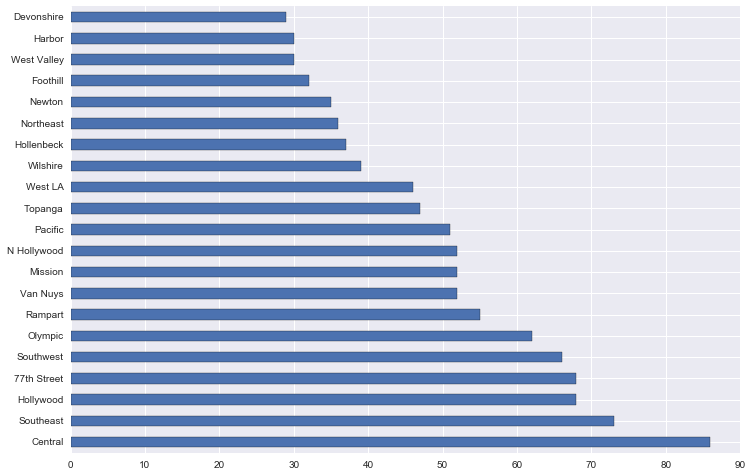

In [55]:
# Plotting to see the number of occurences
rape_df['AREA NAME'].value_counts().plot(kind='barh', figsize=(12,8))

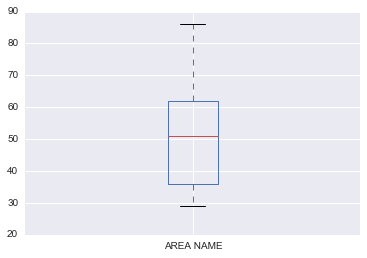

In [50]:
# See the distribution of occurences - Plot 
#Also see if there any outliers, statistically -- A "+" would show on the plot
rape_df['AREA NAME'].value_counts().plot(kind='box')

In [51]:
# See the distribution of occurences - Values
rape_df['AREA NAME'].value_counts().describe()

count    21.000000
mean     49.809524
std      16.141930
min      29.000000
25%      36.000000
50%      51.000000
75%      62.000000
max      86.000000
Name: AREA NAME, dtype: float64

### Look into timeseries

In [69]:
#rename the "DATE Rptd" column
rape_df.columns = [u'date', u'DR. NO', u'DATE OCC', u'TIME OCC', u'AREA',
       u'AREA NAME', u'RD', u'Crm Cd', u'crime_desc', u'Status',
       u'Status Desc', u'LOCATION', u'Cross Street', u'lonlat', u'rape']

In [79]:
# Chainging the column type to dateime
rape_df['date'] = pd.to_datetime(rape_df.date)

/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
# Confirming the type change
rape_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 529 to 227888
Data columns (total 15 columns):
date            1046 non-null datetime64[ns]
DR. NO          1046 non-null int64
DATE OCC        1046 non-null object
TIME OCC        1046 non-null int64
AREA            1046 non-null int64
AREA NAME       1046 non-null object
RD              1046 non-null int64
Crm Cd          1046 non-null int64
crime_desc      1046 non-null object
Status          1046 non-null object
Status Desc     1046 non-null object
LOCATION        1046 non-null object
Cross Street    296 non-null object
lonlat          1046 non-null object
rape            1046 non-null int64
dtypes: datetime64[ns](1), int64(6), object(8)
memory usage: 130.8+ KB


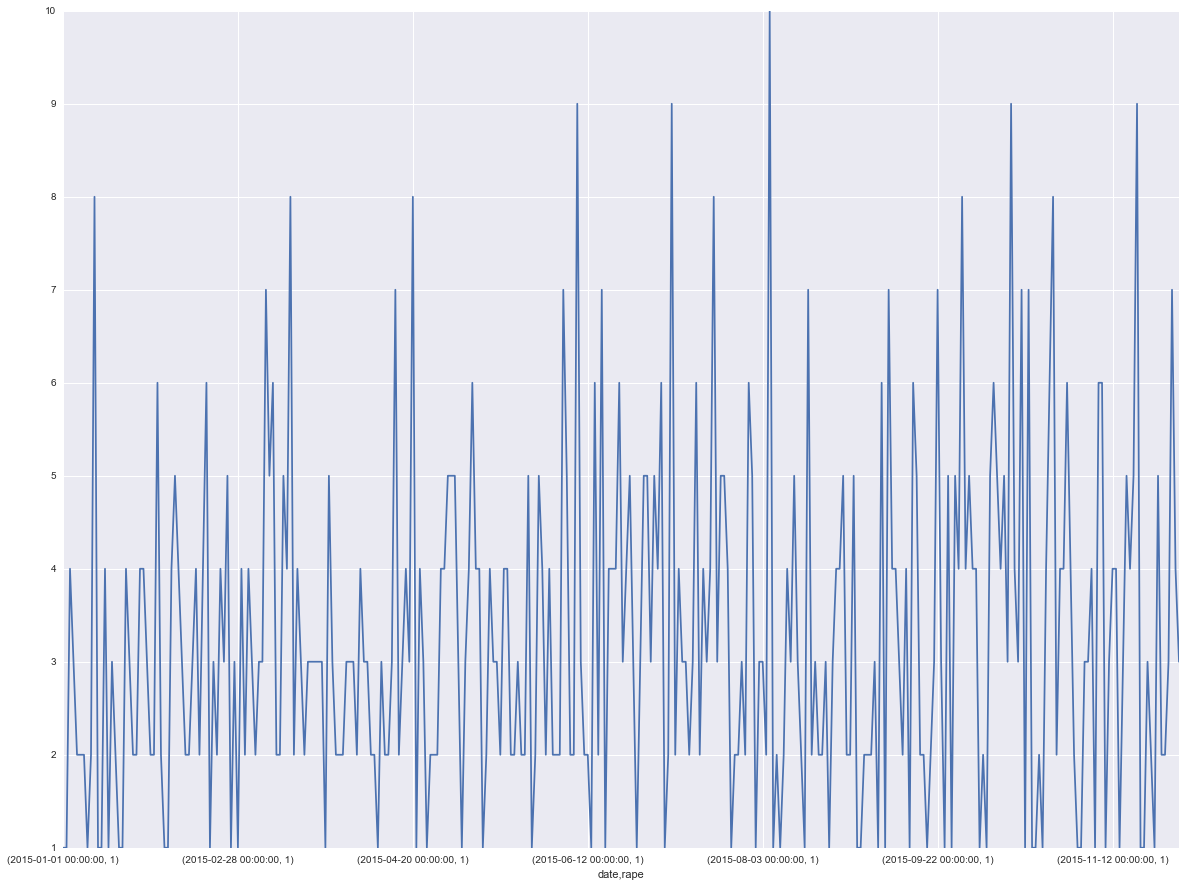

In [92]:
rape_df.groupby('date').rape.value_counts().plot(figsize=(20, 15))

In [122]:
# Top 10 days when rape occured
pd.DataFrame(rape_df.groupby('date').rape.value_counts()).sort('rape', ascending=False).head(10)

,,rape
date,rape,
2015-08-05,1,10
2015-06-09,1,9
2015-10-13,1,9
2015-07-08,1,9
2015-11-19,1,9
2015-07-20,1,8
2015-01-11,1,8
2015-04-20,1,8
2015-09-29,1,8


![Month](rape/Month.png)

![Day in Month](rape/DayinMonth.png)

![Day in Month](rape/Weekday.png)

### Look into mapping longitude and latitude

In [60]:
# Renaming the longtude and latitude column
rape_df.columns = [   u'Date Rptd',       u'DR. NO',     u'DATE OCC',     u'TIME OCC',
               u'AREA',    u'AREA NAME',           u'RD',       u'Crm Cd',
         u'crime_desc',       u'Status',  u'Status Desc',     u'LOCATION',
       u'Cross Street',   u'lonlat',         u'rape']

In [84]:
rape_df.head(3)

,date,DR. NO,DATE OCC,TIME OCC,AREA,AREA NAME,RD,Crm Cd,crime_desc,Status,Status Desc,LOCATION,Cross Street,lonlat,rape
529,2015-11-30,150126625,11/30/2015 12:00:00 AM,1240,1,Central,135,121,"RAPE, FORCIBLE",IC,Invest Cont,100 E 3RD ST,NaN,"(34.0496, -118.2458)",1
1096,2015-11-29,150801521,11/29/2015 12:00:00 AM,600,8,West LA,832,122,"RAPE, ATTEMPTED",IC,Invest Cont,MAYFIELD,GRANVILLE,"(34.0505, -118.4650)",1
1264,2015-11-29,151522468,11/29/2015 12:00:00 AM,1000,15,N Hollywood,1599,121,"RAPE, FORCIBLE",IC,Invest Cont,3500 MULTIVIEW DR,NaN,"(34.1275, -118.3603)",1


In [131]:
def parenstrip(x):
    return x[1:-1]

# for i in rape_df.lonlat[:3]:
#     print i[1:-1]

In [134]:
rape_df['lonlat'] = rape_df.lonlat.map(parenstrip)

/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
rape_df.head()

,date,DR. NO,DATE OCC,TIME OCC,AREA,AREA NAME,RD,Crm Cd,crime_desc,Status,Status Desc,LOCATION,Cross Street,lonlat,rape
529,2015-11-30,150126625,11/30/2015 12:00:00 AM,1240,1,Central,135,121,"RAPE, FORCIBLE",IC,Invest Cont,100 E 3RD ST,NaN,"34.0496, -118.2458",1
1096,2015-11-29,150801521,11/29/2015 12:00:00 AM,600,8,West LA,832,122,"RAPE, ATTEMPTED",IC,Invest Cont,MAYFIELD,GRANVILLE,"34.0505, -118.4650",1
1264,2015-11-29,151522468,11/29/2015 12:00:00 AM,1000,15,N Hollywood,1599,121,"RAPE, FORCIBLE",IC,Invest Cont,3500 MULTIVIEW DR,NaN,"34.1275, -118.3603",1
1339,2015-11-30,151821217,11/29/2015 12:00:00 AM,830,18,Southeast,1861,121,"RAPE, FORCIBLE",IC,Invest Cont,700 W IMPERIAL HY,NaN,"33.9310, -118.2870",1
1424,2015-11-29,150126529,11/28/2015 12:00:00 AM,2245,1,Central,142,121,"RAPE, FORCIBLE",IC,Invest Cont,400 S FIGUEROA ST,NaN,"34.0535, -118.2560",1


In [138]:
# Exporting the csv for analysis in Tableau
rape_df.to_csv('rape/rape_df.csv', encoding='utf-8')